In [2]:
import os
import lsdb
import numpy as np
import pandas as pd
from tqdm import tqdm
import itertools

from pathlib import Path

(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel density map - gaia'}>)

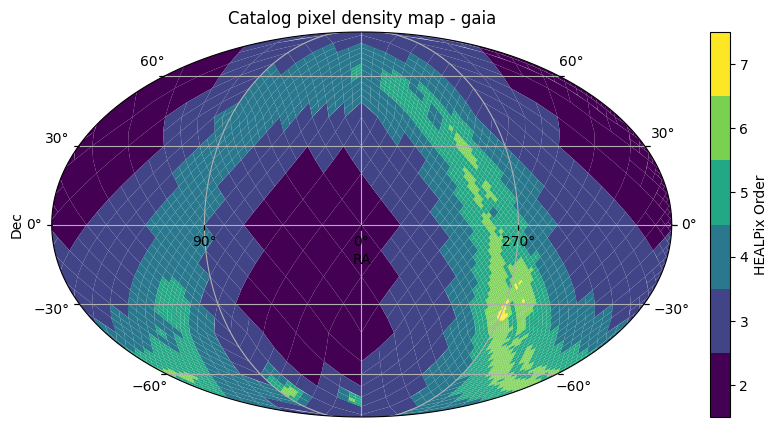

In [3]:
catalog = lsdb.read_hats("https://data.lsdb.io/hats/gaia_dr3/gaia")
catalog.plot_pixels()

In [4]:
# Define the six fields with their coordinates
fields = {
    "ECDFS": (53.13, -28.10),  # Extended Chandra Deep Field South
    "EDFS": (59.10, -48.73),  # Euclid Deep Field South
    "Rubin_SV_38_7": (37.86, 6.98),  # Low Ecliptic Latitude Field
    "Rubin_SV_95_-25": (95.00, -25.00),  # Low Galactic Latitude Field
    "47_Tuc": (6.02, -72.08),  # 47 Tuc Globular Cluster
    "Fornax_dSph": (40.00, -34.45),  # Fornax Dwarf Spheroidal Galaxy
}

# Define the radius for selecting sources
selection_radius_arcsec = 2.0 * 3600  # 2-degree radius

We're going to use the `hc_structure` member of the catalog - this is the "hats catalog" that contains a lot of metadata and ONLY lazy operations. We can use/abuse some of the API to find just the partitions that correspond to the areas of interest.

In [6]:
pixels_of_interest = []
for field_name, (ra, dec) in fields.items():
    # Perform cone search for the given field
    field_cat = catalog.hc_structure.filter_by_cone(
        ra=ra, dec=dec, radius_arcsec=selection_radius_arcsec
    )
    pixels_of_interest.extend(field_cat.get_healpix_pixels())
len(pixels_of_interest)

21

(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'Catalog pixel density map - gaia'}>)

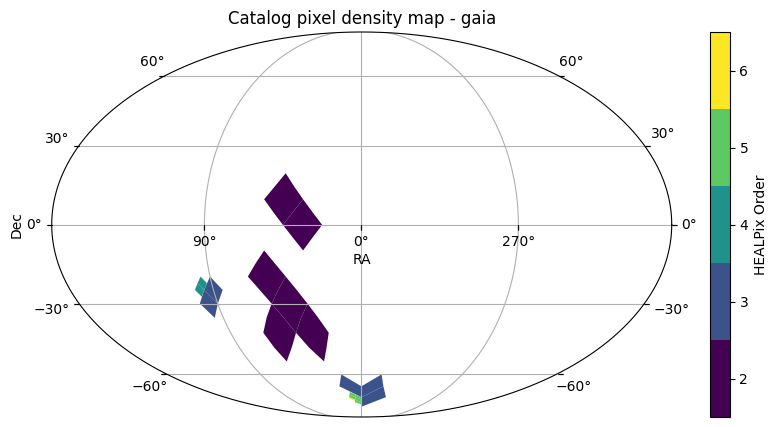

In [7]:
restricted_catalog = catalog.pixel_search(pixels_of_interest)
restricted_catalog.plot_pixels()